## WeRateDogs Twetter Data EDA
### Table of Contents
- [Introduction](#intro)
- [Part I - Gathering Data](#gather)
- [Part II - Accessing Data](#access)
- [Part III - Data Wrangling](#wrangle)
- [Part IV - Data Visualization](#viz)
- [Conclusion](#conclude)

<a id='intro'></a>
### Introduction
WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10 and a numerator greater than 10, because all the dogs are over good. The goal of the project is to use Python to clean real life data, wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations.

<a id='gather'></a>
### Gathering Data, How to Query Twitter Data Using Twitter API
- set up a Twitter developer account, install the tweepy library, using Twitter API to collect the retweet count, favorite count etc. for each tweet ID. 
- unzip the fold, extract all the files in the fold, and read the tsv file into pandas data frame. 
- using pandas to read in the csv file as data frame

In [1]:
conda install -c conda-forge tweepy

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
# load in the libraries
import pandas as pd 
import numpy as np 
import requests
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
# read in the data as pandas data frame
df1_archive=pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
df1_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [5]:
tweet_id=df1_archive.tweet_id.values
tweet_id[0:5]

array([892420643555336193, 892177421306343426, 891815181378084864,
       891689557279858688, 891327558926688256])

In [6]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = 'EsLTYhZX39hlroeNobMnzGOvh'
consumer_secret = 'aSXwOBr7CEjvn7nyFxdUwL3yyQsjR2ytCP7ejk2CxJu7Y5Jsyx'
access_token = '897169895212765184-a94FaPDyHJlWGyRyhYii3Ayf2vbEJ33'
access_secret = 'hS0j8oHmTBKTsXzUrWG4SLYaXTVQT3ahRoVOkLzVmWqV5'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df1_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
           # print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            count+=1
            print(str(count)+ ":" + "Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)

1:Fail
2:Fail
3:Fail
4:Fail
5:Fail
6:Fail
7:Fail
8:Fail
9:Fail
10:Fail
11:Fail
12:Fail
13:Fail
14:Fail
15:Fail
16:Fail
17:Fail
18:Fail
19:Fail
20:Fail
21:Fail


Rate limit reached. Sleeping for: 680


22:Fail
23:Fail


Rate limit reached. Sleeping for: 681


1943.4818435702473


In [7]:
import json
data=[]
with open('tweet_json.txt') as file:
    for lines in file:
        data.append(json.loads(lines))       

In [8]:
df2_json=pd.DataFrame(data)

In [9]:
# Use requests library to programmatically download the tsv file
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [10]:
df3_image=pd.read_csv('image_predictions.tsv', sep='\t')

<a id='access'></a>
### Accessing Data
Visual and programmatic assessments of the datasets to identify the quality and tidiness issues. First, make a copy of the datasets. 

In [11]:
df1_clean=df1_archive.copy()
df2_clean=df2_json.copy()
df3_clean=df3_image.copy()

In [12]:
df1_clean.shape, df2_clean.shape, df3_clean.shape

((2356, 17), (2333, 32), (2075, 12))

In [13]:
df1_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [14]:
# to see the full text of source, and we can see that there are different source of devicebb
pd.set_option('display.max_colwidth', -1)
df1_clean[['tweet_id','source']].sample(10)

,tweet_id,source
909,757725642876129280,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
1905,674606911342424069,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
1490,692901601640583168,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
859,763183847194451968,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
1268,709556954897764353,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
2060,671182547775299584,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
2021,672082170312290304,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
2148,669749430875258880,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
1508,691483041324204033,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
1526,690374419777196032,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"


In [15]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
# from here is very clear that 5 columns have more that 2000 records are null values
# and we should drop those columns with such a big percentage of missing value
df1_clean.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

In [17]:
# the expanded_urls contains the tweet_id, and we already have that, so don't need the column
list(df1_clean['expanded_urls'])[0:10]

['https://twitter.com/dog_rates/status/892420643555336193/photo/1',
 'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
 'https://twitter.com/dog_rates/status/891815181378084864/photo/1',
 'https://twitter.com/dog_rates/status/891689557279858688/photo/1',
 'https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1',
 'https://twitter.com/dog_rates/status/891087950875897856/photo/1',
 'https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1',
 'https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1',
 'https://twitter.com/dog_rates/status/890609185150312448/photo/1',
 'https://twitter.com/dog_rates/status/890240255349198849/photo/1']

In [18]:
df1_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
df1_clean.name.value_counts()

None        745
a           55 
Charlie     12 
Lucy        11 
Oliver      11 
            .. 
Terrenth    1  
Bradlay     1  
such        1  
Crawford    1  
Kody        1  
Name: name, Length: 957, dtype: int64

In [20]:
#seems that we cannot find the missing names back from the text column. 
pd.set_option('display.max_colwidth', -1)
df1_clean[df1_clean.name=='None']['text'].sample(10)

1860    RT until we find this dog. Clearly a cool dog (front leg relaxed out window). Looks to be a superb driver. 10/10 https://t.co/MnTrKaQ8Wn    
1401    I know this is a tad late but here's a wonderful Valentine's Day pupper 12/10 https://t.co/hTE2PEwGvi                                       
513     PUPDATE: I've been informed that Augie was actually bringing his family these flowers when he tripped. Very good boy. Pupgraded to 11/10    
1804    This pups goal was to get all four feet as close to each other as possible. Valiant effort 12/10 https://t.co/2mXALbgBTV                    
1204    Here's a super majestic doggo and a sunset 11/10 https://t.co/UACnoyi8zu                                                                    
869     Guys.. we only rate dogs. Pls don't send any more pics of the Loch Ness Monster. Only send in dogs. Thank you. 11/10 https://t.co/obH5vMbm1j
1461    Please only send in dogs. This t-rex is very scary. 5/10 ...might still pet (vid by @helizabethmic

In [21]:
#no duplicated id, that's a good thing, means no duplicated record
df1_clean.tweet_id.duplicated().sum()

0

In [22]:
# after a general review, those columns maybe useful for analysis later. 
df1_clean=df1_archive[['tweet_id','timestamp','source','rating_numerator','rating_denominator','name', 'doggo', 'floofer', 'pupper', 'puppo']]
df1_clean.head(2)

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",13,10,Tilly,None,None,None,None


In [23]:
df2_clean.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


In [24]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 32 columns):
created_at                       2333 non-null object
id                               2333 non-null int64
id_str                           2333 non-null object
full_text                        2333 non-null object
truncated                        2333 non-null bool
display_text_range               2333 non-null object
entities                         2333 non-null object
extended_entities                2061 non-null object
source                           2333 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null object
in_reply_to_screen_name          77 non-null object
user                             2333 non-null object
geo                              0 non-null object
coordinates                      0 non-null

In [25]:
df2_clean.id_str.duplicated().sum()

0

In [26]:
df2_clean.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,quoted_status_id
count,2.333000e+03,7.700000e+01,7.700000e+01,2333.000000,2333.000000,2.600000e+01
mean,7.419279e+17,7.440692e+17,2.040329e+16,2801.027004,7759.968710,8.113972e+17
std,6.820607e+16,7.524295e+16,1.260797e+17,4741.473629,12046.544697,6.295843e+16
min,6.660209e+17,6.658147e+17,1.185634e+07,1.000000,0.000000,6.721083e+17
25%,6.782786e+17,6.757073e+17,3.589728e+08,562.000000,1348.000000,7.761338e+17
50%,7.184547e+17,7.032559e+17,4.196984e+09,1309.000000,3379.000000,8.281173e+17
75%,7.986654e+17,8.233264e+17,4.196984e+09,3262.000000,9520.000000,8.637581e+17
max,8.924206e+17,8.862664e+17,8.405479e+17,80496.000000,160819.000000,8.860534e+17


In [27]:
df2_clean=df2_clean[['id_str','retweet_count','favorite_count']]
df2_clean.head()

,id_str,retweet_count,favorite_count
0,892420643555336193,7976,37213
1,892177421306343426,5918,32008
2,891815181378084864,3911,24097
3,891689557279858688,8122,40538
4,891327558926688256,8807,38766


In [28]:
df3_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [29]:
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
df3_clean.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [31]:
df3_image.tweet_id.duplicated().sum()

0

<a id='wrangle'></a>
### Data Wrangling 

### Define the issues, include completeness, validity, accuracy, consistency
From the above visual and programmatic assessments, we can summarize part of the data quality and tidiness issues that we plan to clean<br>
twitter-archive-enhanced.csv 
- 1.convert tweet_id from int to string, use `.astype(str)`
- 2.trim the timestamp column to only date, convert the data type from object to datetime, rename the column name to date
- 3.extract the method or device from the source column use `str.extract()`function with regular expression pattern
- 4.normalize the numerator by divided by the denominator, replace extreme and unreasonable value with mean
- 5.change the denominator from various numbers to 10, base of 10 is fixed in this rating system
- 6.some dog's name is not correct, like 'None', 'a','the' but seems we cannot recover all the names from the text column
- 7.remove extra dog stage description. there are 14 tweet_id have 2 descriptions of dog age stage

tweet_json.txt file
- 1.there are duplicated columns for the tweet id with different data types, drop integer one, rename the other one
- 2.for the source column, only need the information of the device
- 3.use the full text column to retrieve and organize dogs' names

image-prediction.tsv
- 1.convert tweet_id from integer to string
### Tidiness
each observation is a row, and each type of observational unit is a table.
- 1.melt doggo, floofer, pupper, puppo into one column 
- 2.merge the df2_clean table with df1_clean

### Cleaning and testing data

**Code:** clean quality issue 1-2

In [32]:
df1_clean.tweet_id=df1_clean.tweet_id.astype(str)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/generic.py:5209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [33]:
df1_clean['timestamp'] = df1_clean['timestamp'].astype(str).str.split(' ',expand=True)[0]
df1_clean.timestamp=pd.to_datetime(df1_clean.timestamp)
df1_clean.rename(columns={'timestamp':'date'}, inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


**Test**

In [34]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2356 non-null object
date                  2356 non-null datetime64[ns]
source                2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 184.2+ KB


**Code:** clean quality issue 3

In [35]:
df1_clean['source_device']=df1_clean['source'].str.extract(r'[>](\w+.-?.?\w+.a?.?\w+)[<]', expand=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Test**

In [36]:
df1_clean.source_device.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene    91  
Twitter Web Client     33  
TweetDeck              11  
Name: source_device, dtype: int64

In [37]:
df1_clean.drop('source', axis=1, inplace=True)
df1_clean.head(2)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,tweet_id,date,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_device
0,892420643555336193,2017-08-01,13,10,Phineas,None,None,None,None,Twitter for iPhone
1,892177421306343426,2017-08-01,13,10,Tilly,None,None,None,None,Twitter for iPhone


**Code:** clean quality issue 4-5

In [38]:
# those records have large rating numerator and denominator looks like still followed the rating sysytem
# we can nomalize the rating _numerator by divided by rating_denominator, then change the denominator back to 10
greater_10=df1_clean.query('rating_denominator > 10')
print(greater_10.shape)
print('')
greater_10

(20, 10)



,tweet_id,date,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_device
342,832088576586297345,2017-02-16,11,15,None,None,None,None,None,Twitter for iPhone
433,820690176645140481,2017-01-15,84,70,None,None,None,None,None,Twitter for iPhone
784,775096608509886464,2016-09-11,9,11,None,None,None,None,None,Twitter for iPhone
902,758467244762497024,2016-07-28,165,150,None,None,None,None,None,Twitter for iPhone
1068,740373189193256964,2016-06-08,9,11,None,None,None,None,None,Twitter for iPhone
1120,731156023742988288,2016-05-13,204,170,this,None,None,None,None,Twitter for iPhone
1165,722974582966214656,2016-04-21,4,20,None,None,None,None,None,Twitter for iPhone
1202,716439118184652801,2016-04-03,50,50,Bluebert,None,None,None,None,Twitter for iPhone
1228,713900603437621249,2016-03-27,99,90,None,None,None,None,None,Twitter for iPhone
1254,710658690886586372,2016-03-18,80,80,None,None,None,None,None,Twitter for iPhone


In [39]:
greater_10_list=greater_10.index
greater_10_list

Int64Index([ 342,  433,  784,  902, 1068, 1120, 1165, 1202, 1228, 1254, 1274,
            1351, 1433, 1598, 1634, 1635, 1662, 1663, 1779, 1843],
           dtype='int64')

In [40]:
df1_clean.loc[df1_clean['rating_denominator']> 10, 'rating_numerator']=round(df1_clean['rating_numerator']/df1_clean['rating_denominator']*10, 0)
df1_clean.loc[df1_clean['rating_denominator']> 10, 'rating_denominator']=10

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


**Test**

In [41]:
df1_clean.iloc[greater_10_list, :]

,tweet_id,date,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_device
342,832088576586297345,2017-02-16,7.0,10,None,None,None,None,None,Twitter for iPhone
433,820690176645140481,2017-01-15,12.0,10,None,None,None,None,None,Twitter for iPhone
784,775096608509886464,2016-09-11,8.0,10,None,None,None,None,None,Twitter for iPhone
902,758467244762497024,2016-07-28,11.0,10,None,None,None,None,None,Twitter for iPhone
1068,740373189193256964,2016-06-08,8.0,10,None,None,None,None,None,Twitter for iPhone
1120,731156023742988288,2016-05-13,12.0,10,this,None,None,None,None,Twitter for iPhone
1165,722974582966214656,2016-04-21,2.0,10,None,None,None,None,None,Twitter for iPhone
1202,716439118184652801,2016-04-03,10.0,10,Bluebert,None,None,None,None,Twitter for iPhone
1228,713900603437621249,2016-03-27,11.0,10,None,None,None,None,None,Twitter for iPhone
1254,710658690886586372,2016-03-18,10.0,10,None,None,None,None,None,Twitter for iPhone


In [42]:
less_10=df1_clean.query('rating_denominator < 10')
less_10

,tweet_id,date,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_device
313,835246439529840640,2017-02-24,960.0,0,None,None,None,None,None,Twitter for iPhone
516,810984652412424192,2016-12-19,24.0,7,Sam,None,None,None,None,Twitter for iPhone
2335,666287406224695296,2015-11-16,1.0,2,an,None,None,None,None,Twitter for iPhone


In [43]:
equal_10=df1_clean[(df1_clean.rating_numerator>17)&(df1_clean.rating_denominator==10)]
equal_10

,tweet_id,date,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_device
188,855862651834028034,2017-04-22,420.0,10,None,None,None,None,None,Twitter for iPhone
189,855860136149123072,2017-04-22,666.0,10,None,None,None,None,None,Twitter for iPhone
290,838150277551247360,2017-03-04,182.0,10,None,None,None,None,None,Twitter for iPhone
340,832215909146226688,2017-02-16,75.0,10,Logan,None,None,None,None,Twitter for iPhone
695,786709082849828864,2016-10-13,75.0,10,Logan,None,None,None,None,Twitter for iPhone
763,778027034220126208,2016-09-20,27.0,10,Sophie,None,None,pupper,None,Twitter for iPhone
979,749981277374128128,2016-07-04,1776.0,10,Atticus,None,None,None,None,TweetDeck
1712,680494726643068929,2015-12-25,26.0,10,None,None,None,None,None,Twitter for iPhone
2074,670842764863651840,2015-11-29,420.0,10,None,None,None,None,None,Twitter for iPhone


In [44]:
drop_id=less_10.tweet_id.tolist()+equal_10.tweet_id.tolist()
drop_index=less_10.index.tolist()+equal_10.index.tolist()

In [45]:
# drop the 12 records of the rating_numerator with abnormal values
df1_clean.drop(df1_clean.index[drop_index], inplace=True)
df1_clean=df1_clean.reset_index(drop=True)

**Test**

In [46]:
# test the drop, the 12 records dropped successfully, the sum is 0
df1_clean['tweet_id'].isin(drop_id).sum()

0

**Code:** clean quality issue 6-7

In [47]:
df1_clean[['doggo', 'floofer', 'pupper', 'puppo']]=df1_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace('None', np.nan)
df1_clean.head()

,tweet_id,date,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_device
0,892420643555336193,2017-08-01,13.0,10,Phineas,NaN,NaN,NaN,NaN,Twitter for iPhone
1,892177421306343426,2017-08-01,13.0,10,Tilly,NaN,NaN,NaN,NaN,Twitter for iPhone
2,891815181378084864,2017-07-31,12.0,10,Archie,NaN,NaN,NaN,NaN,Twitter for iPhone
3,891689557279858688,2017-07-30,13.0,10,Darla,NaN,NaN,NaN,NaN,Twitter for iPhone
4,891327558926688256,2017-07-29,12.0,10,Franklin,NaN,NaN,NaN,NaN,Twitter for iPhone


In [48]:
df1_clean.doggo.fillna(1, inplace=True)
df1_clean.floofer.fillna(2, inplace=True)
df1_clean.pupper.fillna(3, inplace=True)
df1_clean.puppo.fillna(4, inplace=True)
df1_clean.head(10)

,tweet_id,date,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_device
0,892420643555336193,2017-08-01,13.0,10,Phineas,1,2,3,4,Twitter for iPhone
1,892177421306343426,2017-08-01,13.0,10,Tilly,1,2,3,4,Twitter for iPhone
2,891815181378084864,2017-07-31,12.0,10,Archie,1,2,3,4,Twitter for iPhone
3,891689557279858688,2017-07-30,13.0,10,Darla,1,2,3,4,Twitter for iPhone
4,891327558926688256,2017-07-29,12.0,10,Franklin,1,2,3,4,Twitter for iPhone
5,891087950875897856,2017-07-29,13.0,10,None,1,2,3,4,Twitter for iPhone
6,890971913173991426,2017-07-28,13.0,10,Jax,1,2,3,4,Twitter for iPhone
7,890729181411237888,2017-07-28,13.0,10,None,1,2,3,4,Twitter for iPhone
8,890609185150312448,2017-07-27,13.0,10,Zoey,1,2,3,4,Twitter for iPhone
9,890240255349198849,2017-07-26,14.0,10,Cassie,doggo,2,3,4,Twitter for iPhone


In [49]:
df1_clean.loc[(df1_clean.doggo==1)&(df1_clean.floofer==2)&(df1_clean.pupper==3)&(df1_clean.puppo==4),['doggo', 'floofer', 'pupper', 'puppo']]=0
df1_clean.head(10)

,tweet_id,date,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,source_device
0,892420643555336193,2017-08-01,13.0,10,Phineas,0,0,0,0,Twitter for iPhone
1,892177421306343426,2017-08-01,13.0,10,Tilly,0,0,0,0,Twitter for iPhone
2,891815181378084864,2017-07-31,12.0,10,Archie,0,0,0,0,Twitter for iPhone
3,891689557279858688,2017-07-30,13.0,10,Darla,0,0,0,0,Twitter for iPhone
4,891327558926688256,2017-07-29,12.0,10,Franklin,0,0,0,0,Twitter for iPhone
5,891087950875897856,2017-07-29,13.0,10,None,0,0,0,0,Twitter for iPhone
6,890971913173991426,2017-07-28,13.0,10,Jax,0,0,0,0,Twitter for iPhone
7,890729181411237888,2017-07-28,13.0,10,None,0,0,0,0,Twitter for iPhone
8,890609185150312448,2017-07-27,13.0,10,Zoey,0,0,0,0,Twitter for iPhone
9,890240255349198849,2017-07-26,14.0,10,Cassie,doggo,2,3,4,Twitter for iPhone


In [50]:
id_list=['tweet_id','date','rating_numerator','rating_denominator','name','source_device']
df1_clean=pd.melt(df1_clean, id_vars=id_list, var_name='age_stage', value_name='age')
print('the shape of df1_clean after melt function is: ', df1_clean.shape)
print(' ')
df1_clean.head()

the shape of df1_clean after melt function is:  (9376, 8)
 


,tweet_id,date,rating_numerator,rating_denominator,name,source_device,age_stage,age
0,892420643555336193,2017-08-01,13.0,10,Phineas,Twitter for iPhone,doggo,0
1,892177421306343426,2017-08-01,13.0,10,Tilly,Twitter for iPhone,doggo,0
2,891815181378084864,2017-07-31,12.0,10,Archie,Twitter for iPhone,doggo,0
3,891689557279858688,2017-07-30,13.0,10,Darla,Twitter for iPhone,doggo,0
4,891327558926688256,2017-07-29,12.0,10,Franklin,Twitter for iPhone,doggo,0


In [51]:
df1_clean.age.value_counts()

0          7860
2          369 
4          349 
1          282 
pupper     256 
3          123 
doggo      97  
puppo      30  
floofer    10  
Name: age, dtype: int64

In [52]:
#the age=0 rows are the record without dog stage value, each row has 4 record after melt with different age stage
df1_clean.loc[df1_clean['age']==0, 'age_stage'] = 'None'
df1_clean.drop_duplicates(inplace=True)
df1_clean.shape

(3481, 8)

After dropped the duplicates, the number of records should be 2344, since the remaining rows are more than that, we have more duplicates in the dataset. The age values equal to 1, 2, 3, or 4 means duplicates too. For we filled nan value with numbers if the row has at least one age_stage value. 

In [53]:
# to filter out the duplicate that age labeled 1, 2, 3 or 4, we just query out the data not in the list
df1_clean=df1_clean.query('age not in (1, 2, 3, 4)')
df1_clean.shape

(2358, 8)

We should dropped all the duplicates, but the number of rows is 14 rows more than we expected, so, some special duplicates must exist, let's find them.<br>
Duplicated rows must have duplicated tweet_id, and there are total 28 records have duplicated tweet_id. They all have two age_stage values, let's drop the one called 'doggo'

In [54]:
list=df1_clean[df1_clean.tweet_id.duplicated()].tweet_id.tolist()
print('The number of duplicated tweet ids is', len(list),'\nThe ids are:', list)
print(' ')
df1_clean.query('tweet_id in list').sort_values('tweet_id')

The number of duplicated tweet ids is 14 
The ids are: ['854010172552949760', '817777686764523521', '808106460588765185', '802265048156610565', '801115127852503040', '785639753186217984', '781308096455073793', '775898661951791106', '770093767776997377', '759793422261743616', '751583847268179968', '741067306818797568', '733109485275860992', '855851453814013952']
 


,tweet_id,date,rating_numerator,rating_denominator,name,source_device,age_stage,age
1104,733109485275860992,2016-05-19,12.0,10,None,Twitter for iPhone,doggo,doggo
5792,733109485275860992,2016-05-19,12.0,10,None,Twitter for iPhone,pupper,pupper
1054,741067306818797568,2016-06-10,12.0,10,just,Twitter for iPhone,doggo,doggo
5742,741067306818797568,2016-06-10,12.0,10,just,Twitter for iPhone,pupper,pupper
5636,751583847268179968,2016-07-09,5.0,10,None,Twitter for iPhone,pupper,pupper
948,751583847268179968,2016-07-09,5.0,10,None,Twitter for iPhone,doggo,doggo
881,759793422261743616,2016-07-31,12.0,10,Maggie,Twitter for iPhone,doggo,doggo
5569,759793422261743616,2016-07-31,12.0,10,Maggie,Twitter for iPhone,pupper,pupper
814,770093767776997377,2016-08-29,12.0,10,just,Twitter for iPhone,doggo,doggo
5502,770093767776997377,2016-08-29,12.0,10,just,Twitter for iPhone,pupper,pupper


In [55]:
df1_clean=df1_clean.reset_index(drop=True)

In [56]:
stage_drop=df1_clean.query('(tweet_id in list) & (age_stage=="doggo")').index
stage_drop

Int64Index([170, 178, 415, 478, 508, 517, 630, 657, 694, 734, 797, 858, 944,
            985],
           dtype='int64')

In [57]:
df1_clean=df1_clean.drop(df1_clean.index[stage_drop])
df1_clean=df1_clean.drop('age', axis=1)

In [58]:
df1_clean.reset_index(drop=True)
df1_clean.shape

(2344, 7)

**Test**

In [59]:
#the sum should be 0 after we dropped all the duplicates
df1_clean.tweet_id.duplicated().sum()

0

**Code:** clean quality issue in df2_clean

In [60]:
df2_clean.rename(columns={'id_str':'tweet_id'}, inplace=True)
df2_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7976,37213
1,892177421306343426,5918,32008
2,891815181378084864,3911,24097
3,891689557279858688,8122,40538
4,891327558926688256,8807,38766


In [61]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id          2333 non-null object
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


In [62]:
df1_combine=pd.merge(df1_clean,df2_clean, on='tweet_id', how='inner')

In [63]:
df1_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2321 entries, 0 to 2320
Data columns (total 9 columns):
tweet_id              2321 non-null object
date                  2321 non-null datetime64[ns]
rating_numerator      2321 non-null float64
rating_denominator    2321 non-null int64
name                  2321 non-null object
source_device         2321 non-null object
age_stage             2321 non-null object
retweet_count         2321 non-null int64
favorite_count        2321 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 181.3+ KB


**Code:** clean quality and tidiness issues in df3_clean

In [64]:
df3_clean.tweet_id=df3_clean.tweet_id.astype(str)
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


<a id='viz'></a>
### Storing, Analyzing and Visualizing Data
- Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv. 
- If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).

In [65]:
df1_combine.to_csv('twitter_archive_master.csv', index=False)

In [66]:
df3_clean.to_csv('twitter_image_prediction.csv', index=False)

In [67]:
df1_combine.head()

,tweet_id,date,rating_numerator,rating_denominator,name,source_device,age_stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01,13.0,10,Phineas,Twitter for iPhone,None,7976,37213
1,892177421306343426,2017-08-01,13.0,10,Tilly,Twitter for iPhone,None,5918,32008
2,891815181378084864,2017-07-31,12.0,10,Archie,Twitter for iPhone,None,3911,24097
3,891689557279858688,2017-07-30,13.0,10,Darla,Twitter for iPhone,None,8122,40538
4,891327558926688256,2017-07-29,12.0,10,Franklin,Twitter for iPhone,None,8807,38766


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 10.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 10.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 10.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


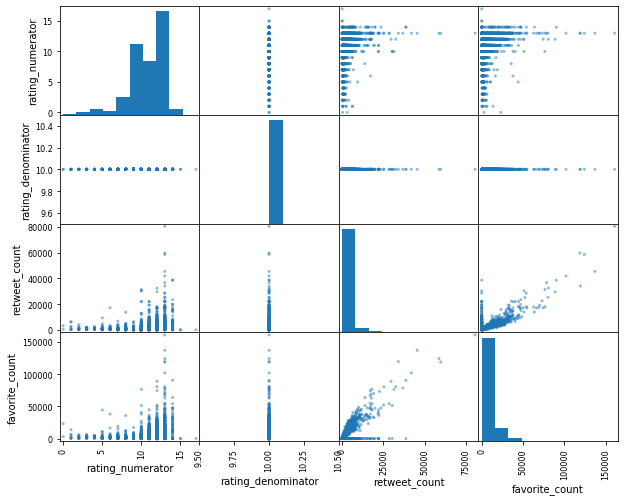

In [68]:
#from this scatter-histogram we can have a brief idea of the linear relationship between each two variables, retweet counts and favorite counts
# show strong positive linear relationship
pd.plotting.scatter_matrix(df1_combine, figsize=(10, 8));

To better understand user behavior, we plot the bar chart as below to show the source device when tweeting. Phone device turned out to be the most popular tool when tweeting in WeRateDogs account. 

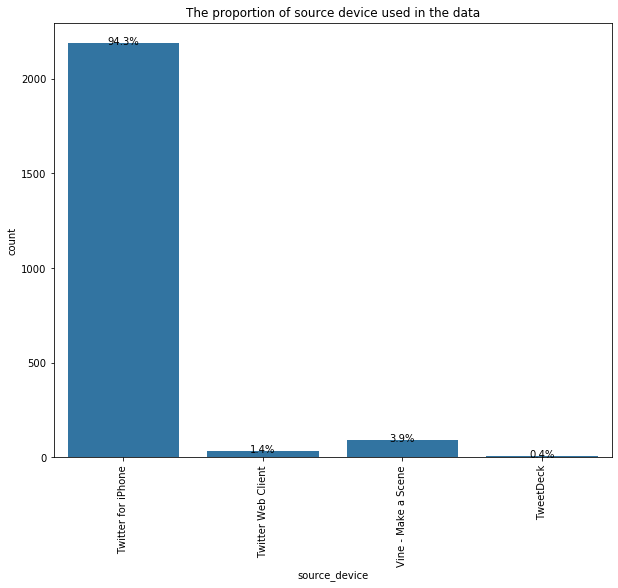

In [69]:
#0 dark blue, 1 orange, 2 green, 3 red, 4 purple, 5 brown, 6 light purple, 7
plt.figure(figsize=(10,8));
base_color=sb.color_palette()[0];
sb.countplot(data = df1_combine, x = 'source_device', color=base_color);
plt.title('The proportion of source device used in the data');
plt.xticks(rotation=90);

n_points = df1_combine['source_device'].count();
cat_counts = df1_combine['source_device'].value_counts();
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black') 

People may have biased favorites on certain aged dogs, with the data we have in hand, the scatter plots show that in each age stage, favorite counts and retweet counts has strong linear relationship. So people love dogs at all ages. 

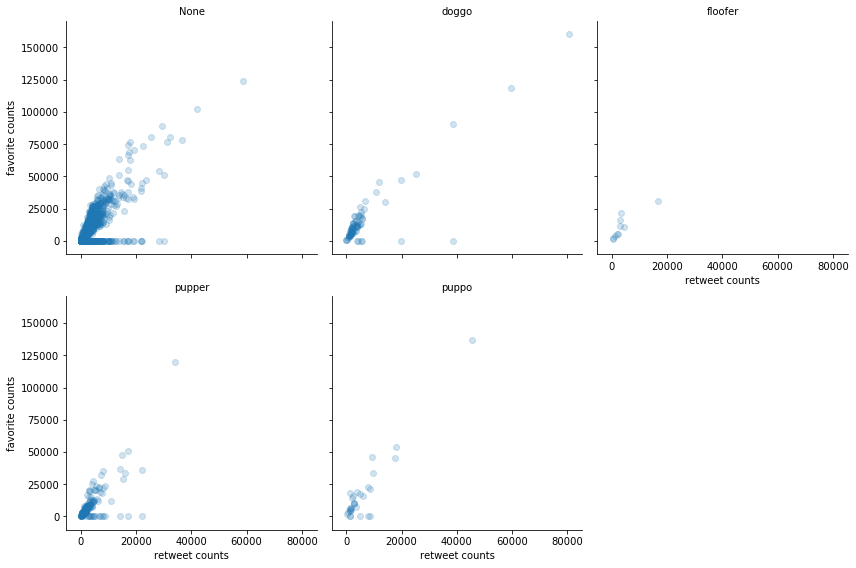

In [70]:
# plotting, facet the third categorical variable, plot 2 numeric 1 categorical
g = sb.FacetGrid(data = df1_combine, col = 'age_stage', height = 4,col_wrap = 3)
g.map(sb.regplot, 'retweet_count', 'favorite_count', y_jitter = 0.04, fit_reg = False, scatter_kws = {'alpha' : 1/5})
g.set_ylabels('favorite counts')
g.set_xlabels('retweet counts')
g.set_titles('{col_name}')
plt.show()

There are three algorithms to predict the pictures uploaded in each tweet id. Some people do post their other pets in this account, and some costumes also make it harder to predict if the picture is of a dog or not, but algorithm 1 did a better job than other two. We can see from the histogram below, that for a number of pictures, algorithm 1 can be 100% confident that the picture is what it predicted. 

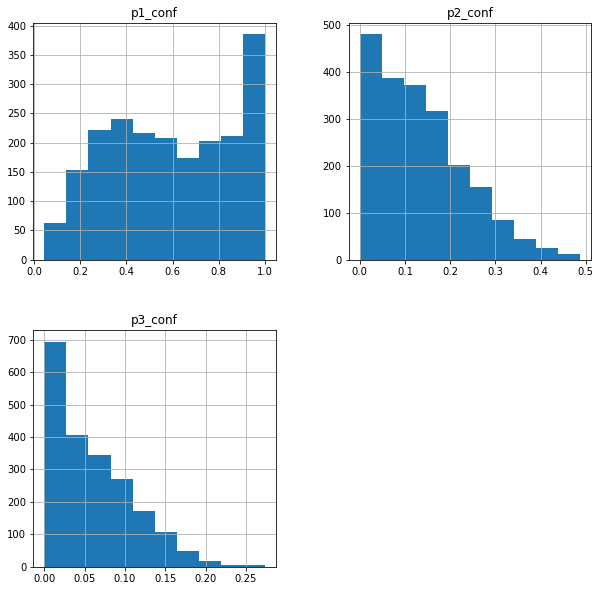

In [71]:
df3_clean[['p1_conf', 'p2_conf', 'p3_conf']].hist(figsize=(10, 10));

We can look a little bit deeper into algorithm 1. Around 74% of the pictures, there is a dog in it while 26% there is not from the bar chart on the left. The histogram on the right side shows that for some of the non-dog pictures, some of them have a very high confident level. Let's open couple of the pictures to double check, and we find that actually there is a dog in it, just other objects are more obvious and some dogs just look like toys or post in a side angle. 

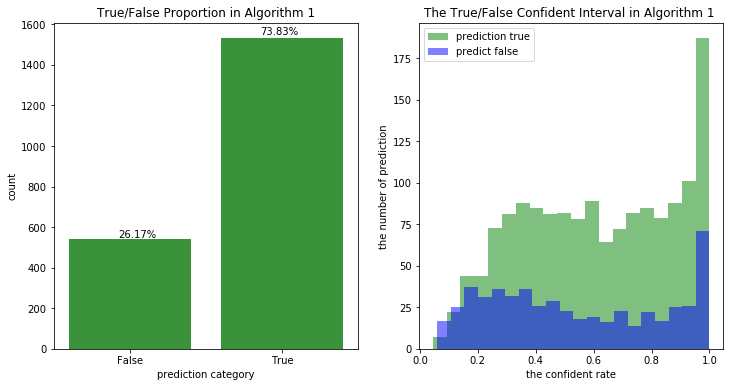

In [72]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sb.countplot(data=df3_clean, x='p1_dog', color=sb.color_palette()[2])
plt.title('True/False Proportion in Algorithm 1')
plt.xlabel('prediction category')
label=df3_clean.p1_dog.value_counts(normalize=True)
label_t='{:0.2f}%'.format(label[1]*100)
label_f='{:0.2f}%'.format(label[0]*100)
plt.text(0.05, 550, label_f, ha = 'center', color = 'black')
plt.text(0.98, 1550,label_t, ha = 'center', color = 'black')

plt.subplot(1, 2, 2)
df3_clean[df3_clean.p1_dog==True].p1_conf.plot(kind='hist', alpha=0.5, bins=20, color='green', label='prediction true')
df3_clean[~df3_clean.p1_dog==True].p1_conf.plot(kind='hist', alpha=0.5, bins=20, color='blue', label='predict false')
plt.xlabel('the confident rate')
plt.ylabel('the number of prediction')
plt.title('The True/False Confident Interval in Algorithm 1 ')
plt.legend();

plt.show()

We can take a look at the top 10 dogs that algorithm 1 can predict correct, and the 10 breeds that the algorithm had hard time on prediction. 

Text(0, 0.5, 'dog breeds')

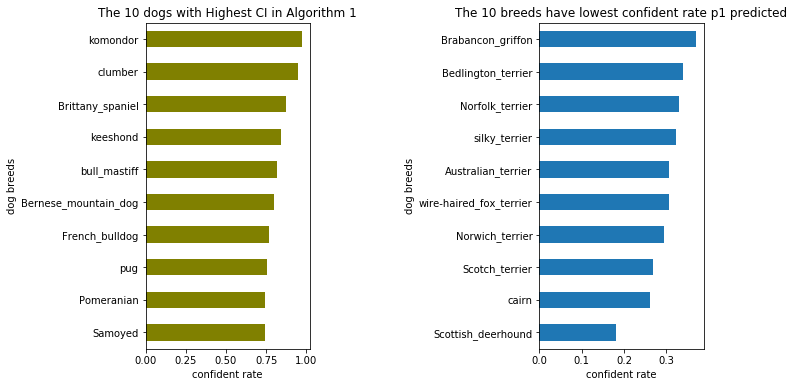

In [73]:
plt.subplot(1, 3, 1)
df3_clean[df3_clean.p1_dog==True].groupby('p1')['p1_conf'].mean().sort_values(ascending=True).tail(10).plot(kind='barh', color='olive');
plt.title('The 10 dogs with Highest CI in Algorithm 1')
plt.xlabel('confident rate')
plt.ylabel('dog breeds')

plt.subplot(1,3,3)
df3_clean[df3_clean.p1_dog==True].groupby('p1')['p1_conf'].mean().sort_values(ascending=True).head(10).plot(kind='barh', figsize=(10,6));
plt.title('The 10 breeds have lowest confident rate p1 predicted')
plt.xlabel('confident rate')
plt.ylabel('dog breeds')

<a id='conclude'></a>
### Conclusion
Real life data never be clean. The WeRageDogs account datasets require a lot of time to clean and we did not get everything done here. We cleaned more than eight quality issues and some tidiness issues, and prepared the master datasets for visualization. 

It is a lot of fun to explore the datasets, analyze the datasets, and provide insights from the datasets. We analyzed the user behaviors by plotting the bar chart of source devices used in the data, we made histogram to show the rating system people applied in rating and we also explored the image prediction algorithms.But we can still do more, we can also build models to model the linear relationship between favorite counts and other variables or a logistic regression model on the image prediction data. Explore more and we will find more interesting results. 